# 1. Data

In [1]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV

## 1.1 Read the data

In [2]:
data_red = pd.read_csv("/Users/zhilanc/Desktop/Y2 machine learning/assignmnet1/winequality/winequality-red.csv",sep = ';')

In [3]:
data_red["color"] = "red"

In [4]:
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
data_white = pd.read_csv("/Users/zhilanc/Desktop/Y2 machine learning/assignmnet1/winequality/winequality-white.csv",sep = ';')

In [6]:
data_white["color"] = "white"

In [7]:
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [8]:
data = pd.concat([data_red, data_white], ignore_index=True, sort=False)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## 1.2 Data analysis

## 1.3 Data preprocessing

### 1.3.1 Encoding the Categorical Variable

In [9]:
encoder = OrdinalEncoder()
data.iloc[:,-1]= encoder.fit_transform(np.reshape(data.iloc[:,-1].values,(-1,1)))

In [10]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0


### 1.3.2 Scale the dataset

In [11]:
scaler = StandardScaler()

X =  np.append(data.iloc[:,:-2].values,data.iloc[:,-1].values.reshape(-1,1),axis=1)
X[:,:-1] = scaler.fit_transform(X[:,:-1])
y = data.iloc[:,-2].values

# 2. Closed-form OLS solution

## 2.1 When number of samples varies, other properties are fixed.

In [89]:
closeform_scores = []
model_scores = []
sample_size = np.arange(10,100,5)
for i,s in enumerate(sample_size):
    ols = LinearRegression()
    X_i, y_i ,coef_i= make_regression(n_samples=s, n_features=14, noise=10, coef = True,random_state= 10)
    beta_i = inv(np.transpose(X_i)@X_i)@np.transpose(X_i)@y_i
    ols.alpha = beta_i
    value_1 = np.mean(cross_val_score(ols, X_i, y_i, cv = 2))
    closeform_scores.append(value_1)
    ols.alpha = coef_i
    value_2 = np.mean(cross_val_score(ols, X_i, y_i, cv = 2))
    model_scores.append(value_2)

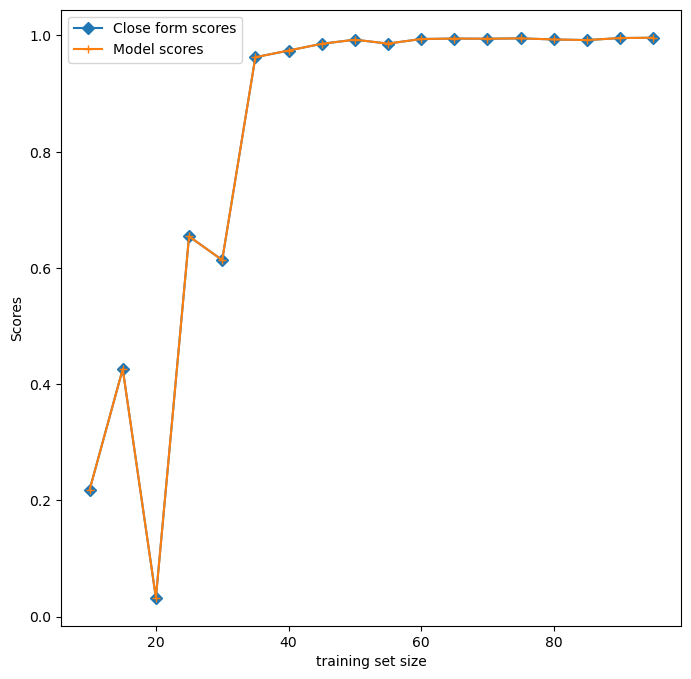

In [90]:
plt.figure(figsize=(8, 8))
plt.plot(sample_size, closeform_scores, marker = 'D', label = "Close form scores")
plt.plot(sample_size, model_scores, marker = '+', label = "Model scores")
plt.xlabel("training set size")
plt.ylabel("Scores")
plt.title("")
plt.legend()
plt.show()

## 2.2 When sd of samples varies, other properties are fixed.

In [98]:
closeform_scores = []
model_scores = []
sd = np.arange(0,300,20)
for i,s in enumerate(sd):
    ols = LinearRegression()
    X_i, y_i ,coef_i= make_regression(n_samples=50, n_features=14, noise=s, coef = True,random_state= 10)
    beta_i = inv(np.transpose(X_i)@X_i)@np.transpose(X_i)@y_i
    ols.alpha = beta_i
    value_1 = np.mean(cross_val_score(ols_1, X_i, y_i, cv = 10))
    closeform_scores.append(value_1)
    ols.alpha = coef_i
    value_2 = np.mean(cross_val_score(ols_2, X_i, y_i, cv = 10))
    model_scores.append(value_2)

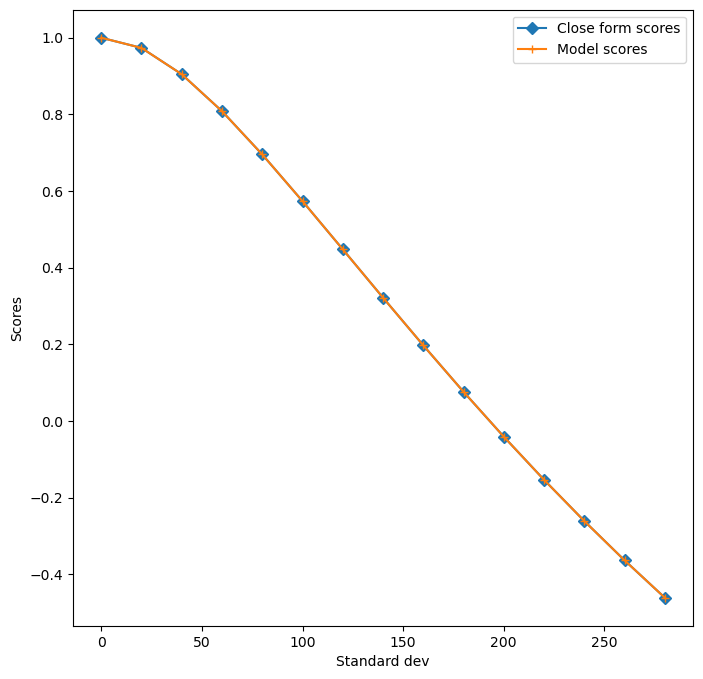

In [99]:
plt.figure(figsize=(8, 8))
plt.plot(sd, closeform_scores, marker = 'D', label = "Close form scores")
plt.plot(sd, model_scores, marker = '+', label = "Model scores")
plt.xlabel("Standard dev")
plt.ylabel("Scores")
plt.title("")
plt.legend()
plt.show()

# 3. Wine Quality Regression

### OLS

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=3/10, random_state=10)

In [18]:
OLS = LinearRegression().fit(X_train, y_train)

In [19]:
y_hat = OLS.predict(X_train)
y_mean = np.mean(data.quality)

MSE = np.mean(np.sum((y_hat-y_train)**2))
MAE = np.mean(np.sum(np.absolute(y_hat-y_train)))
R2 = 1 - (np.sum((y_hat-y_train)**2)/np.sum((y_train-y_mean)**2))
print(f"Mean Squared Error: {MSE:.2f}")
print(f"Mean Absolute Error: {MAE:.2f}")
print(f"R2 : {R2:.2f}")

Mean Squared Error: 2410.45
Mean Absolute Error: 2573.13
R2 : 0.29


In [20]:
print(f"{OLS.score(X_train,y_train):.2f}")

0.29


In [21]:
print(f"{OLS.score(X_test,y_test):.2f}")

0.31


### Ridge Regression

In [22]:
ridge = Ridge()
params = {"alpha" : [0,1e-5,2e-5,3e-5,5e-5,6e-5,1e-4,0.001,0.01,0.02,0.05,0.1,0.2,0.3,0.5,0.8,1,2,5,10,15,20,25,30,35,40,45,50]}
ridge_regression = GridSearchCV(ridge,params,cv=10)
ridge_regression.fit(X_train,y_train)

print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 15}
0.28337614085472085


In [23]:
ridge_params = {"alpha" : np.logspace(-6,2,1000)}
ridge_regression = GridSearchCV(ridge,ridge_params,cv=10)
ridge_regression.fit(X_train,y_train)

print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 16.414029711444666}
0.2833773545614064


In [24]:
ridge_best_alpha = ridge_regression.best_params_["alpha"]
print(f"The optimal value of alpha is {ridge_best_alpha:.6f}")

The optimal value of alpha is 16.414030


Text(0.5, 1.0, 'Learning curve of Ridge Regression')

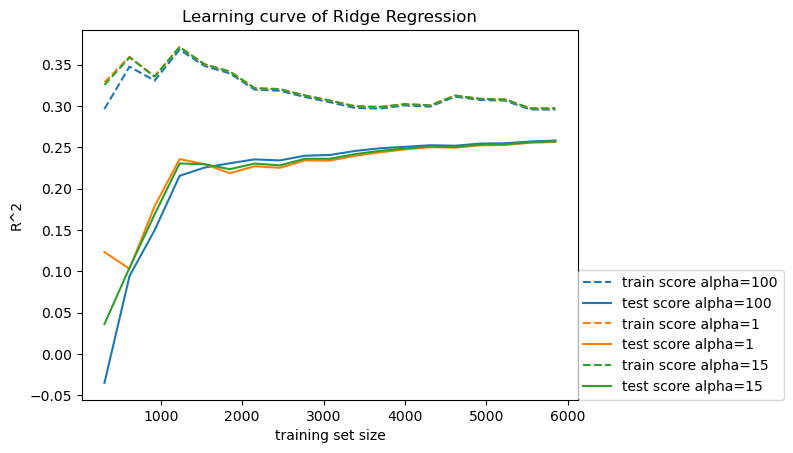

In [25]:
def plot_learning_curve(est, name):
    train_set_size, train_scores, test_scores = learning_curve(est, X, y, cv=10, train_sizes=np.linspace(0, 1, 20)[1:])
    test_mean = test_scores.mean(axis=1)
    train_mean = train_scores.mean(axis=1)
    line, = plt.plot(train_set_size, train_mean, linestyle="--", label= f"train score {name}")
    plt.plot(train_set_size, test_mean, label= f"test score {name}",
             c=line.get_color())

plot_learning_curve(Ridge(alpha=100), "alpha=100")
plot_learning_curve(Ridge(alpha=1), "alpha=1")
plot_learning_curve(Ridge(alpha=15), "alpha=15")

plt.legend(loc=(1, 0))
plt.xlabel("training set size")
plt.ylabel("R^2")
plt.title("Learning curve of Ridge Regression")

### Lasso Regression

In [26]:
lasso = Lasso()
lasso_params = {"alpha" : np.logspace(-10,2,1000)}
lasso_regression = GridSearchCV(lasso,lasso_params,cv=10)
lasso_regression.fit(X_train,y_train)

print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 0.0007028244264308353}
0.28325446974429586


In [27]:
lasso_best_alpha = lasso_regression.best_params_["alpha"]
print(f"The optimal value of alpha is {lasso_best_alpha:.6f}")

The optimal value of alpha is 0.000703


Text(0.5, 1.0, 'Learning curve of Lasso Regression')

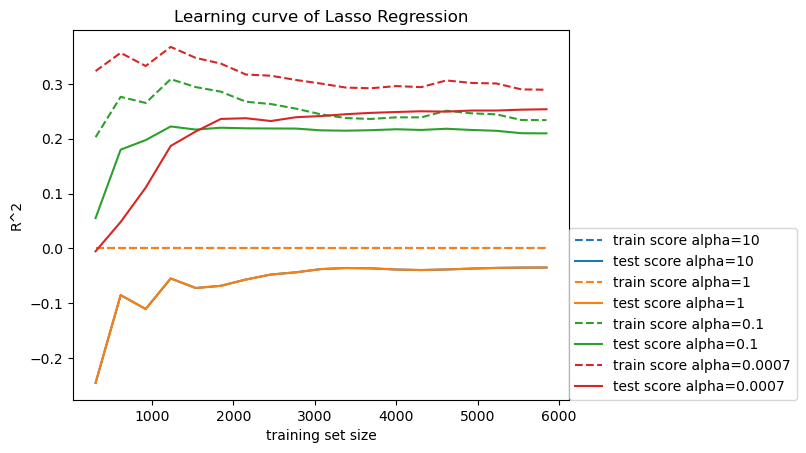

In [28]:
plot_learning_curve(Lasso(alpha=10), "alpha=10")
plot_learning_curve(Lasso(alpha=1), "alpha=1")
plot_learning_curve(Lasso(alpha=1e-1), "alpha=0.1")
plot_learning_curve(Lasso(alpha=7e-3), "alpha=0.0007")

plt.legend(loc=(1, 0))
plt.xlabel("training set size")
plt.ylabel("R^2")
plt.title("Learning curve of Lasso Regression")

### ElasticNet regression

In [43]:
ela = ElasticNetCV(l1_ratio = np.arange(1e-2,1.01,0.01), n_alphas =1000, cv = 10)
ela.fit(X_train,y_train)

ElasticNetCV(cv=10,
             l1_ratio=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             n_alphas=1000)

In [44]:
print(f"{ela_regression.alpha_:.6f}")
print(ela_regression.l1_ratio_)
print(ela_regression.alphas_)

0.002724
0.14
[[3.81350814e+01 3.68340354e+01 3.55773769e+01 ... 4.08766628e-02
  3.94820828e-02 3.81350814e-02]
 [1.90675407e+01 1.84170177e+01 1.77886884e+01 ... 2.04383314e-02
  1.97410414e-02 1.90675407e-02]
 [1.27116938e+01 1.22780118e+01 1.18591256e+01 ... 1.36255543e-02
  1.31606943e-02 1.27116938e-02]
 ...
 [3.89133484e-01 3.75857504e-01 3.63034458e-01 ... 4.17108804e-04
  4.02878396e-04 3.89133484e-04]
 [3.85202843e-01 3.72060964e-01 3.59367443e-01 ... 4.12895583e-04
  3.98808917e-04 3.85202843e-04]
 [3.81350814e-01 3.68340354e-01 3.55773769e-01 ... 4.08766628e-04
  3.94820828e-04 3.81350814e-04]]


Text(0.5, 1.0, 'Learning curve of ElasticNet Regression')

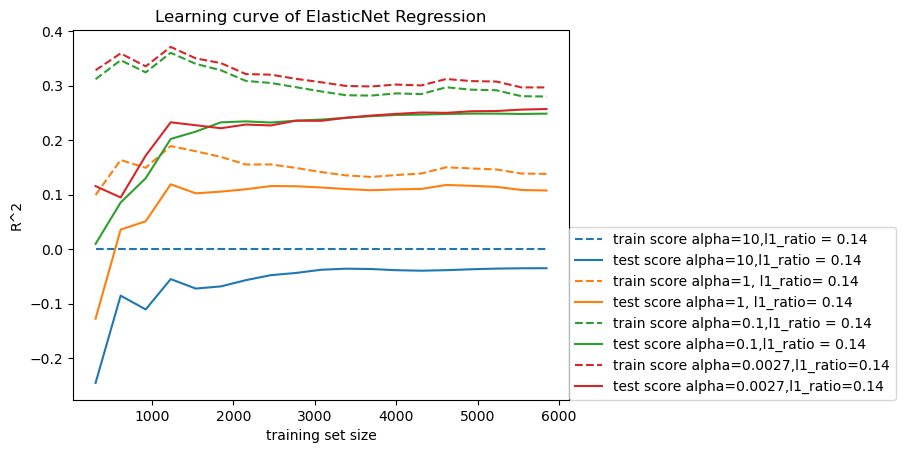

In [64]:
plot_learning_curve(ElasticNet(alpha=10,l1_ratio = 0.14), f"alpha=10,l1_ratio = 0.14")
plot_learning_curve(ElasticNet(alpha=1,l1_ratio = 0.14), f"alpha=1, l1_ratio= 0.14")
plot_learning_curve(ElasticNet(alpha=0.1,l1_ratio = 0.14), f"alpha=0.1,l1_ratio = 0.14")
plot_learning_curve(ElasticNet(alpha=0.0027,l1_ratio = 0.14), "alpha=0.0027,l1_ratio=0.14")

plt.legend(loc=(1, 0))
plt.xlabel("training set size")
plt.ylabel("R^2")
plt.title("Learning curve of ElasticNet Regression")